In [2]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
os.chdir("C:/Users/maryshe/Documents/Data Science_Inernship Worksheets")

In [5]:
df=pd.read_excel("customer_retention_dataset.xlsx",sheet_name="datasheet")
pd.set_option('display.max_rows', None)
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


#### EDA, UNDERSTANDING THE COLUMNS AND DATA AVAILABLE IN THE COLUMNS

In [6]:
df.shape

(269, 71)

In [7]:
#Understand the columns and there Values
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [8]:
#Rename the Columns  for Convience
df.columns=['Gender','Age','city',
'Pin Code',
'Shopping_time',
'online_purchase_1year?',
'access_internet',
'device_used',
       'screen size',
       'operating_system',
       'browser_run',
       'channel_to_favorite_online_1sttime',
       'reach_online_retailstore',
       'time_explored',
       'preferred_payment',
       'abandon_shoppingcart',
       'Why_abandon_Shoppingcart',
       'content_read/understand',
       'highlighted_simila_product',
       'Full_info_listed_seller',
       'relevant_info_listed',
       'Ease_navigation', 'Loading_processing_speed',
       'User_friendly_Interface',
       'Convenient_Payment_methods',
       'Trust_transaction_time',
       'Empathy_customers',
       'guarantee_privacy',
       'availability_to_communication',
       'monetary_benefit/discounts',
       'Enjoyment',
       'convenient_flexible',
       'Return_replacement',
       'access_loyalty_programs',
       'quality_Info',
       'quality_website/application',
       'Net_Benefit',
       'trust',
       'wide_variety_several cato',
       'Provision_product_info',
       'Monetary_saving',
       'Convenience_of_patronizing',
       'sense_of_adventure',
       'e-tailer_social_status',
       'gratification_favorite_e-tailer',
       'fulfill_certain_roles',
       'value_money_spent',
       'online retailers you shopped;                                                                           ',
       'Easy_website_application',
       'Visual appealing web-page layout', 'Wild variety_product',
       'Complete/relevant_info',
       'Fast loading website',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery ',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel',
       'Longer time to get logged',
       'Longer time in displaying graphics and photos',
       'Late declaration of price',
       'Longer page loading time',
       'Limited mode of payment on most products',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another',
       'efficient_as_before',
       'recommend']
df.shape
#Making sure there is no lase of columns

(269, 71)

In [9]:
print(df.isnull().sum())
#Shows there are No null values

Gender                                                                                                      0
Age                                                                                                         0
city                                                                                                        0
Pin Code                                                                                                    0
Shopping_time                                                                                               0
online_purchase_1year?                                                                                      0
access_internet                                                                                             0
device_used                                                                                                 0
screen size                                                                                                 0
operating_

In [10]:
#Understanding what is the data available in df
categorial_features = df.select_dtypes(include=[np.object])
#frequency of categories
for col in categorial_features:
    print(df[col].value_counts())
    

Female    181
Male       88
Name: Gender, dtype: int64
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: city, dtype: int64
Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: Shopping_time, dtype: int64
Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: online_purchase_1year?, dtype: int64
Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: access_internet, dtype: int64
Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Nam

##### The columns and there catogies are checked and 

In [11]:
#I See that these  columns do not give specific understanding of the question
#There are very generatic and are not used for desision making

cols=[ 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
df.drop(df.columns[cols],axis=1,inplace=True)

In [12]:
#There are the catogorical values which mean same but are captured with differences in the values
# Decided to harmonize the headers

df = df.replace({'indifferent  (3)':3,'indifferent (3)':3,'Agree (4)':4,'Strongly agree (5)':5, 'Strongly disagree (1)':1 ,'Dis-agree (2)':2,'Disagree (2)':2,'Indifferent (3)':3})
df['city'] = df['city'].replace({'Greater Noida':'Noida'})
df['access_internet'] = df['access_internet'].replace({'Mobile internet':'Mobile Internet'})

## Columns added for inderstanding
Female    181
Male       88
Name: Gender, dtype: int64

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: city, dtype: int64

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: Shopping_time, dtype: int64

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: online_purchase_1year?, dtype: int64

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: access_internet, dtype: int64

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: device_used, dtype: int64

Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: screen size, dtype: int64

Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: operating_system, dtype: int64

Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: browser_run, dtype: int64

Search Engine        230
Content Marketing     20
Display Adverts       19
Name: channel_to_favorite_online_1sttime, dtype: int64

Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: reach_online_retailstore, dtype: int64

more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: time_explored, dtype: int64

Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: preferred_payment, dtype: int64

Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: abandon_shoppingcart, dtype: int64

Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: Why_abandon_Shoppingcart, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Gender                              269 non-null    object
 1   Age                                 269 non-null    object
 2   city                                269 non-null    object
 3   Pin Code                            269 non-null    int64 
 4   Shopping_time                       269 non-null    object
 5   online_purchase_1year?              269 non-null    object
 6   access_internet                     269 non-null    object
 7   device_used                         269 non-null    object
 8   screen size                         269 non-null    object
 9   operating_system                    269 non-null    object
 10  browser_run                         269 non-null    object
 11  channel_to_favorite_online_1sttime  269 non-null    object

In [14]:
cols = ['Gender','Age','city','Pin Code',
'Shopping_time',
'online_purchase_1year?',
'access_internet',
'device_used',
       'screen size',
       'operating_system',
       'browser_run',
       'channel_to_favorite_online_1sttime',
       'reach_online_retailstore',
       'time_explored',
       'preferred_payment',
       'abandon_shoppingcart',
       'Why_abandon_Shoppingcart']

In [15]:
from sklearn.preprocessing import OrdinalEncoder
df_new=df.iloc[:,:17]

enc = OrdinalEncoder() 
df_cat_encoded= enc.fit_transform(df_new[cols].astype(str))
df_cat_encoded=pd.DataFrame(df_cat_encoded, columns=df_new.columns)

### Understanding the data and relation to each other

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df_cat_encoded.columns


vif_data["VIF"] = [variance_inflation_factor(df_cat_encoded.values, i)
                          for i in range(len(df_cat_encoded.columns))]

print(vif_data)

#This shows that the columns are strongly related to each other, Which is very much expected.


                               feature        VIF
0                               Gender   2.380810
1                                  Age   3.195411
2                                 city   4.432167
3                             Pin Code   4.737475
4                        Shopping_time   6.490132
5               online_purchase_1year?   6.208568
6                      access_internet  12.244036
7                          device_used  23.272303
8                          screen size  12.875337
9                     operating_system  13.915329
10                         browser_run   2.756840
11  channel_to_favorite_online_1sttime  25.370537
12            reach_online_retailstore   5.084016
13                       time_explored   9.346267
14                   preferred_payment   3.955808
15                abandon_shoppingcart  14.557049
16            Why_abandon_Shoppingcart   5.137324


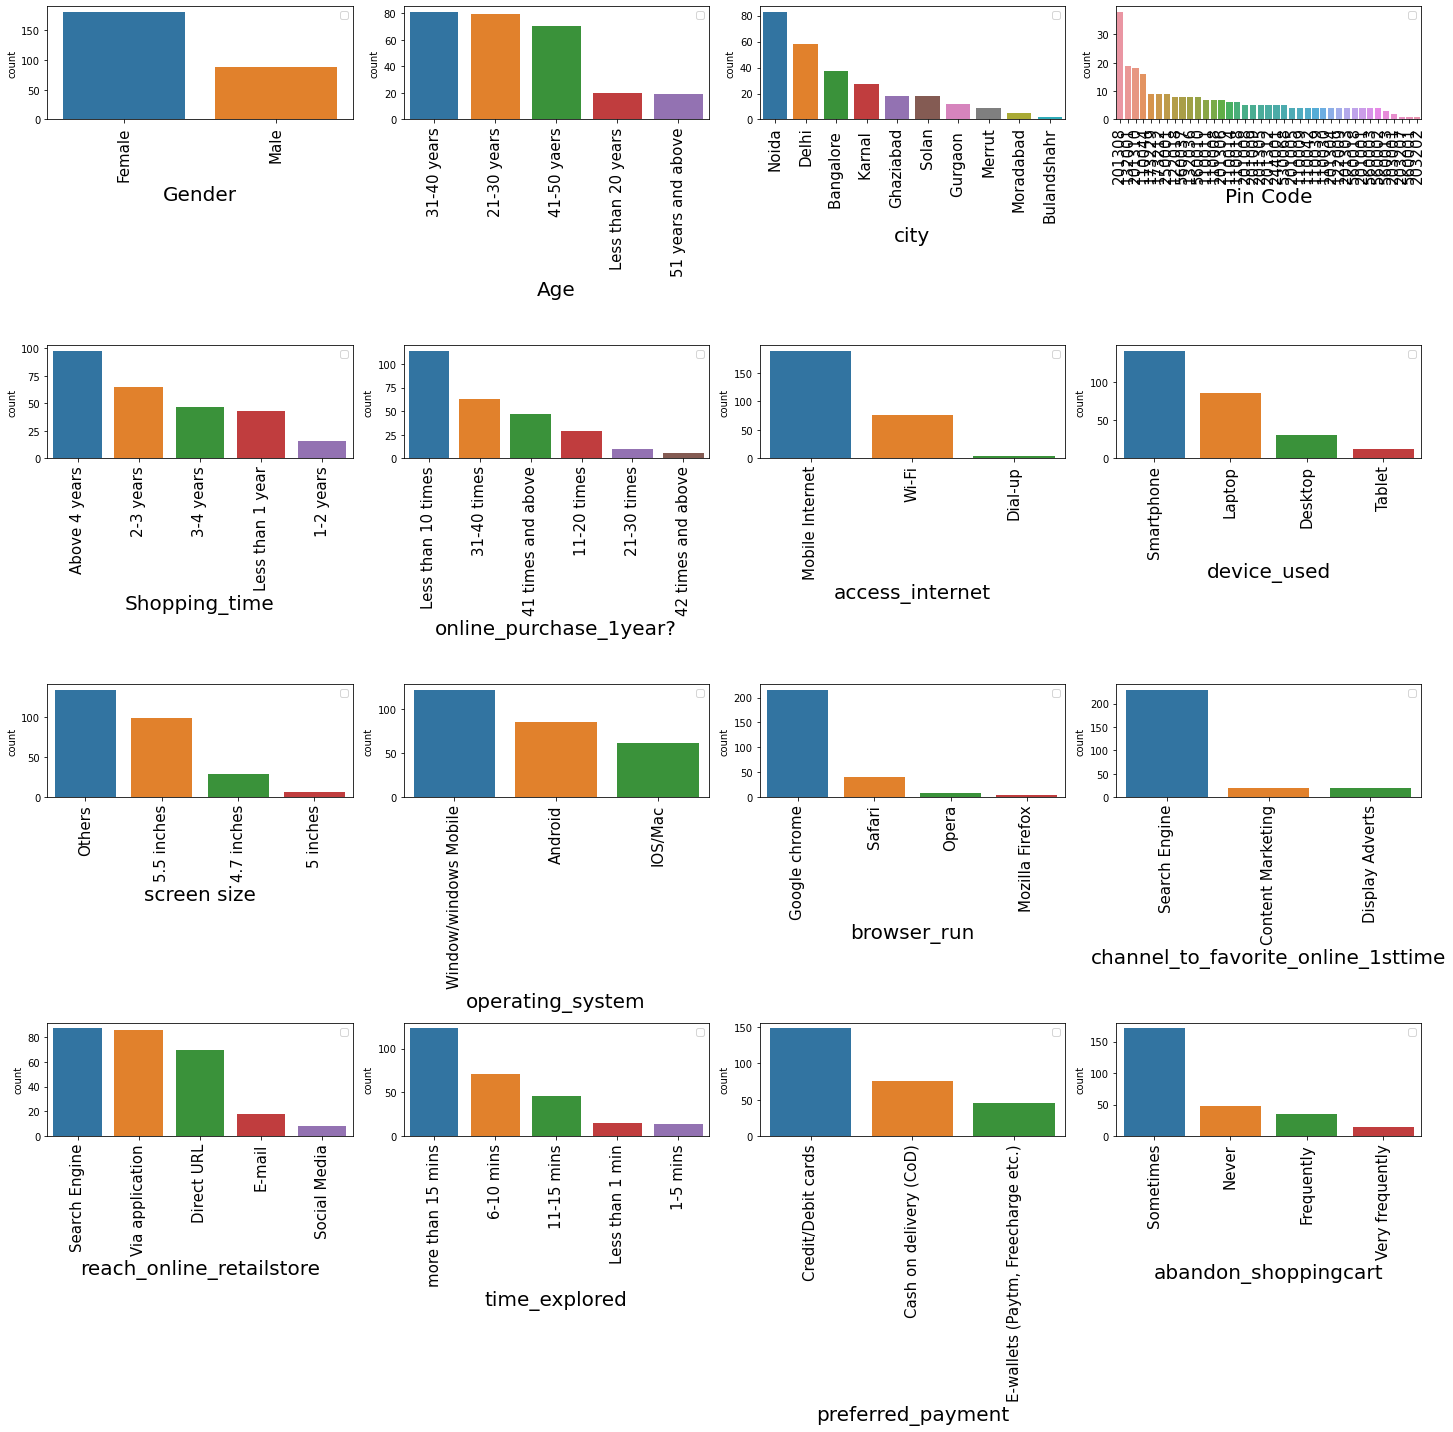

In [17]:
#Checking for the custor distribution data( till the colummn 16 and then would check how there are related to the rating of shoping)
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.countplot(x=df[column], data=df,order=df[column].value_counts().index,dodge=False)
        plt.xlabel(column,fontsize=20)
        plt.xticks(size=15,rotation=90)
        plt.legend([],[], frameon=True)
    plotnumber+=1
plt.tight_layout()  

There is equal probability percenage  of bothe genders in all the feture

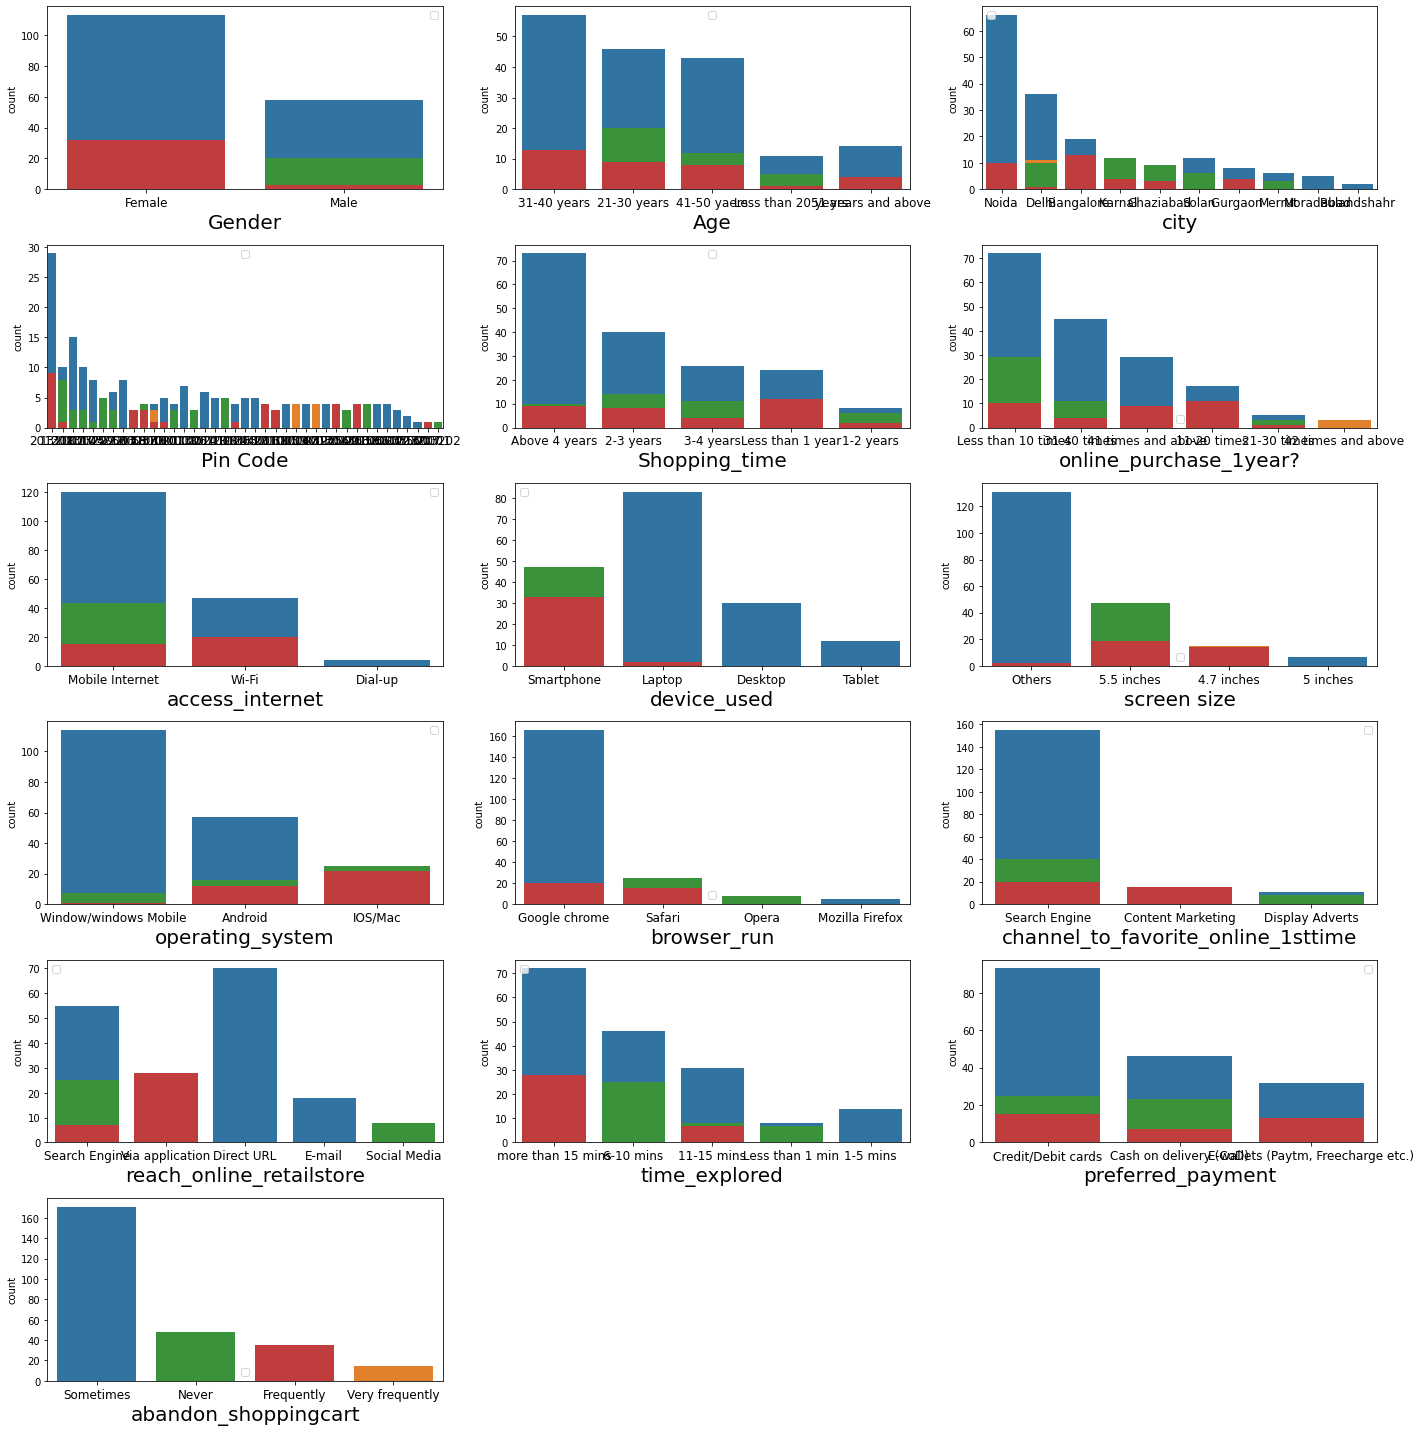

In [18]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=16:
        ax=plt.subplot(6,3,plotnumber)
        sns.countplot(x=df[column], data=df,order=df[column].value_counts().index,hue='abandon_shoppingcart',dodge=False)
        plt.xlabel(column,fontsize=20)
        plt.xticks(size=12)
        plt.legend([],[], frameon=True)
    plotnumber+=1
plt.tight_layout()  

In [19]:
### More frequenty the cart is abanad by Female over Male
### More probability for the age of 31-40 to Abandon the cart
### People who are new to the shopping site, Less than a yr is more probable to abandon the cart
### cart gets abandon mostly when browing on Smart phone
### cart gets abandon if its through application
### cart get abandon more frequent if the time of exploring is moe then 15 mins


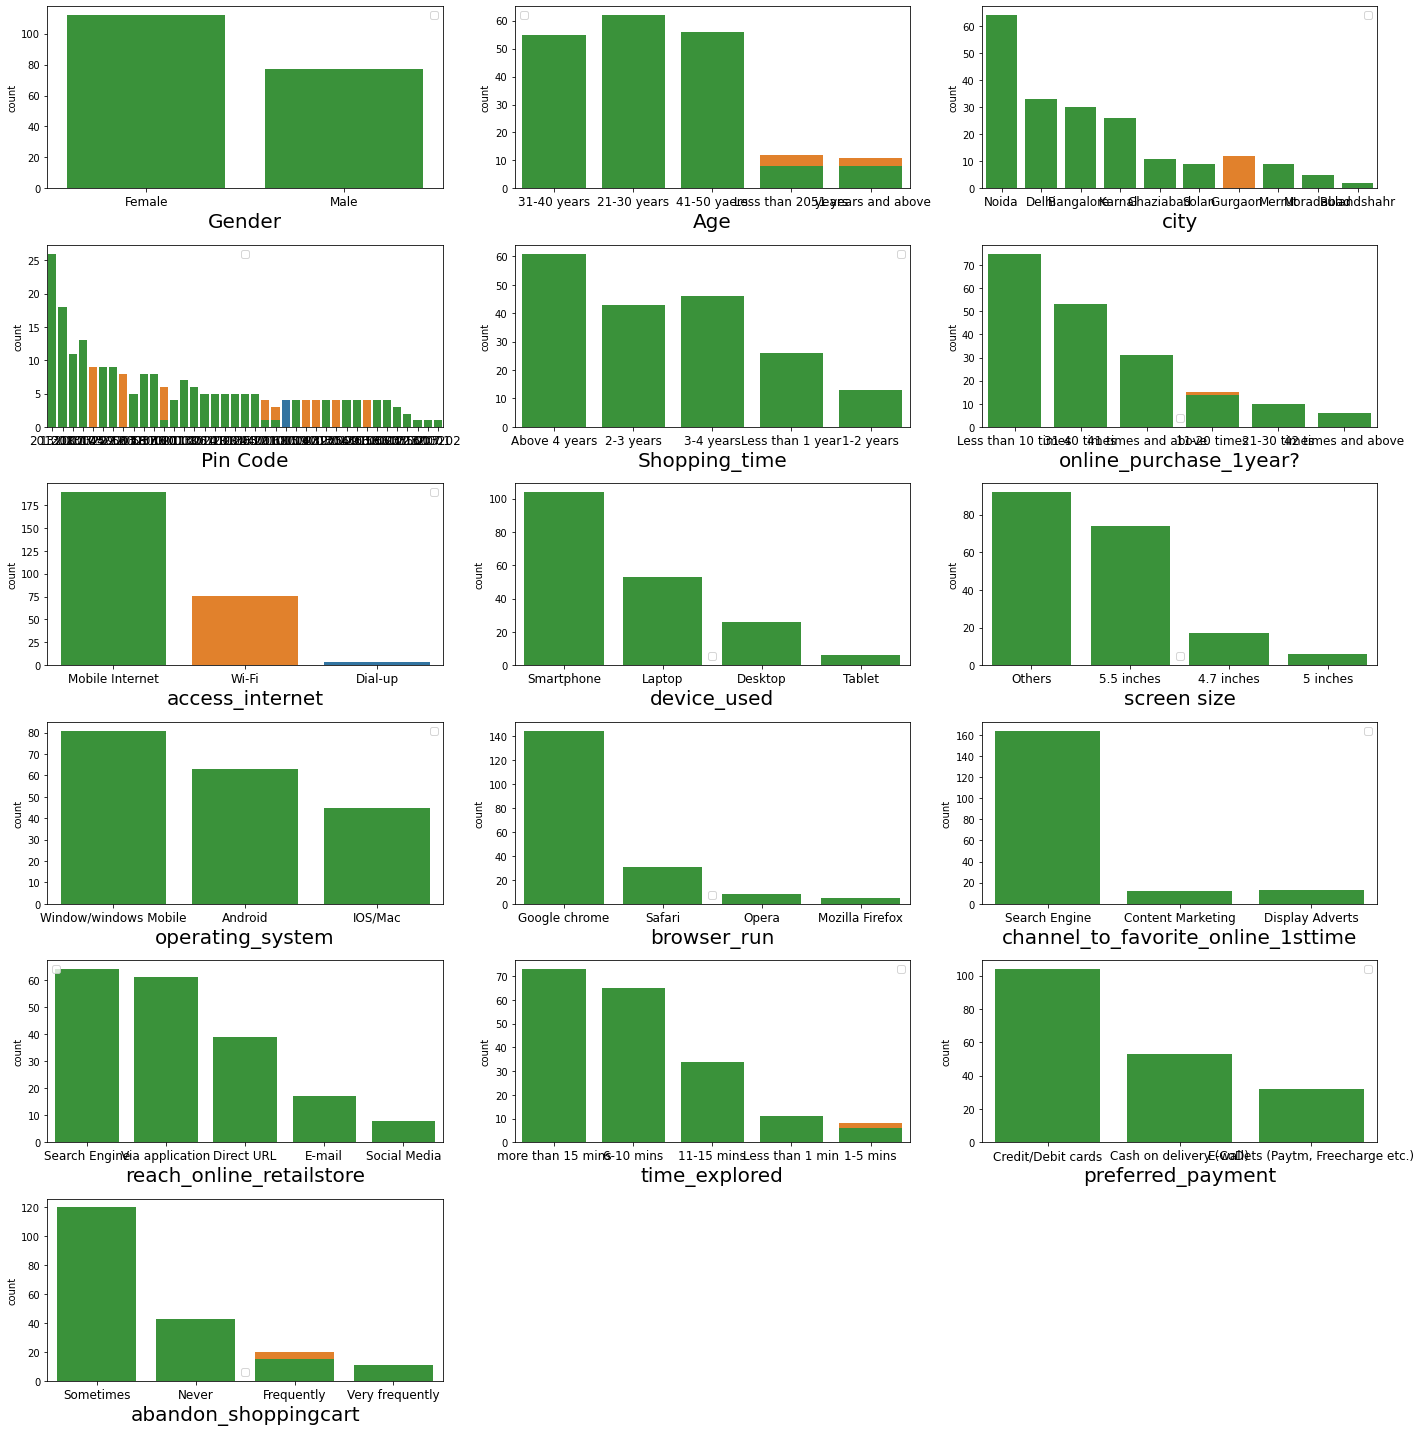

In [46]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=16:
        ax=plt.subplot(6,3,plotnumber)
        
        sns.countplot(x=df[column], data=df,order=df[column].value_counts().index,hue='access_internet',dodge=False)
        plt.xlabel(column,fontsize=20)
        plt.xticks(size=12)
        plt.legend([],[], frameon=True)
      
    plotnumber+=1
plt.tight_layout()  


##  Let see how the Shoping is distributed seperatly not in relation over different catogories

Gender-There are alomost(2.5%) of female who shop than men

Age-Shoping is less prevelent is less than 0 and above 50 age group people

access internet- There is more use of Mobile Internet

Shoping online is moe revelent in big cities like Noida, Delhi, bangalore

There is a pincode area where shoping is very high(201308-GAUTAM BUDDHA NAGAR of Uttar Pradesh.-NOIDA

PEOPLE HAVE BEEN SHOPING FOR A LONG TIME(ABOVE 4YRS ARE STILL THE MAJORE GROUP SHOPING)

Its been that people are shoping aroun 10 times in a year

Most of them use Mobile internet on Window operating Smart phone with biggger screen size above 5.5

Chrome is the broswer

Search engine is the favorite online for the 1st time and then this is also the main means to reach retail stores, It is 
mostly more then 15 mins exploring happends

Payments are by Credit and Debit cards

Abandon is done only some time

##  Let see how the Shoping is distributed seen in relation to each other catogories

In [21]:
#Lets create the data set which give information on customer 
df_new=df.iloc[:,:17]
df_new

,Gender,Age,city,Pin Code,Shopping_time,online_purchase_1year?,access_internet,device_used,screen size,operating_system,browser_run,channel_to_favorite_online_1sttime,reach_online_retailstore,time_explored,preferred_payment,abandon_shoppingcart,Why_abandon_Shoppingcart
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,Search Engine,Via application,more than 15 mins,Credit/Debit cards,Very frequently,Promo code not applicable
2,Female,21-30 years,Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,Google chrome,Search Engine,Via application,11-15 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Promo code not applicable
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,Safari,Search Engine,Search Engine,6-10 mins,Credit/Debit cards,Never,Better alternative offer
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Safari,Content Marketing,Via application,more than 15 mins,Credit/Debit cards,Frequently,Better alternative offer
5,Female,31-40 years,Noida,201308,Above 4 years,41 times and above,Wi-Fi,Smartphone,5.5 inches,Android,Google chrome,Search Engine,Via application,more than 15 mins,"E-wallets (Paytm, Freecharge etc.)",Frequently,Better alternative offer
6,Male,41-50 yaers,Delhi,110011,Above 4 years,31-40 times,Wi-Fi,Tablet,Others,Android,Google chrome,Display Adverts,Direct URL,more than 15 mins,Credit/Debit cards,Sometimes,Promo code not applicable
7,Male,41-50 yaers,Delhi,110018,3-4 years,Less than 10 times,Mobile Internet,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,E-mail,6-10 mins,Credit/Debit cards,Sometimes,Change in price
8,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,Google chrome,Search Engine,Direct URL,1-5 mins,Cash on delivery (CoD),Sometimes,No preferred mode of payment
9,Female,31-40 years,Delhi,110039,Less than 1 year,Less than 10 times,Wi-Fi,Laptop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,more than 15 mins,Cash on delivery (CoD),Sometimes,Lack of trust


In [22]:
group_name = df_new.groupby(['Gender','Age','city',
'Pin Code',
'Shopping_time',
'online_purchase_1year?',
'access_internet',
'device_used',
       'screen size',
       'operating_system',
       'browser_run',
       'channel_to_favorite_online_1sttime',
       'reach_online_retailstore',
       'time_explored',
       'preferred_payment',
       'abandon_shoppingcart',
       'Why_abandon_Shoppingcart'])



In [23]:
group_name.size().unstack()

Why_abandon_Shoppingcart                                                                                                                                                                                                                                                                                    Better alternative offer  \
Gender Age                city        Pin Code Shopping_time    online_purchase_1year? access_internet device_used screen size operating_system      browser_run     channel_to_favorite_online_1sttime reach_online_retailstore time_explored     preferred_payment                  abandon_shoppingcart                             
Female 21-30 years        Bangalore   530068   2-3 years        11-20 times            Wi-Fi           Smartphone  4.7 inches  IOS/Mac               Safari          Content Marketing                  Via application          more than 15 mins Credit/Debit cards                 Frequently                                 4.0   
                                                                Less than 10 times     Mobile Internet Laptop      Others      Window/windows Mobile Google chrome   Search Engine                      Direct URL               more than 15 mins Credit/Debit cards                 Sometimes                                  1.0   
                                      560002   Above 4 years    31-40 times            Mobile Internet Laptop      Others      Window/windows Mobile Google chrome   Search Engine                      Search Engine            more than 15 mins Cash on delivery (CoD)             Sometimes                                  NaN   
                                                                Less than 10 times     Mobile Internet Smartphone  Others      Android               Google chrome   Search Engine                      Via application          Less than 1 min   Cash on delivery (CoD)             Sometimes                                  NaN   
                                      560003   3-4 years        11-20 times            Mobile Internet Laptop      Others      Window/windows Mobile Google chrome   Search Engine                      Search Engine            more than 15 mins Cash on delivery (CoD)             Sometimes                                  NaN   
                                               Above 4 years    31-40 times            Mobile Internet Desktop     Others      Window/windows Mobile Google chrome   Search Engine                      E-mail                   6-10 mins         Credit/Debit cards                 Sometimes                                  NaN   
                                      560018   2-3 years        11-20 times            Mobile Internet Smartphone  4.7 inches  IOS/Mac               Safari          Content Marketing                  Via application          more than 15 mins Credit/Debit cards                 Frequently                                 1.0   
                                      560037   2-3 years        11-20 times            Wi-Fi           Smartphone  4.7 inches  IOS/Mac               Safari          Content Marketing                  Via application          more than 15 mins Credit/Debit cards                 Frequently                                 3.0   
                                                                41 times and above     Mobile Internet Smartphone  5.5 inches  IOS/Mac               Safari          Search Engine                      Search Engine            6-10 mins         Credit/Debit cards                 Never                                      1.0   
                          Delhi       110008   Above 4 years    41 times and above     Wi-Fi           Laptop      Others      Window/windows Mobile Google chrome   Search Engine                      Direct URL               more than 15 mins Credit/Debit cards                 Sometimes                                  3.0   
                                      110030   Above 4 years    

### Biodata of the costomer

In [24]:
from scipy.stats import chi2_contingency
factors_paired = [(i,j) for i in df_new.columns.values for j in df_new.columns.values] 

chi2, p_values =[], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(df_new[f[0]], df_new[f[1]]))   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:      # for same factor pair
        chi2.append(0)
        p_values.append(0)

p_values = np.array(p_values).reshape((17,17)) # shape it as a matrix
p_values = pd.DataFrame(p_values, index=df_new.columns.values, columns=df_new.columns.values) # then a df for convenience
p_values

,Gender,Age,city,Pin Code,Shopping_time,online_purchase_1year?,access_internet,device_used,screen size,operating_system,browser_run,channel_to_favorite_online_1sttime,reach_online_retailstore,time_explored,preferred_payment,abandon_shoppingcart,Why_abandon_Shoppingcart
Gender,0.000000e+00,2.910016e-01,5.499560e-14,6.133367e-17,4.574198e-03,2.102097e-05,7.422540e-08,1.066516e-06,1.418198e-02,8.377407e-01,9.491138e-03,2.682586e-03,3.208746e-02,2.328853e-08,9.862056e-02,5.976764e-03,1.604878e-01
Age,2.910016e-01,0.000000e+00,3.126940e-34,6.782690e-56,1.839177e-05,3.874825e-10,9.963352e-05,2.950067e-06,4.622931e-05,9.794346e-03,5.653826e-03,3.767170e-04,2.585184e-09,3.516663e-11,1.681123e-03,6.841496e-02,3.222535e-17
city,5.499560e-14,3.126940e-34,0.000000e+00,3.939284e-309,5.982937e-15,9.683347e-28,3.473317e-08,1.266279e-05,7.705720e-22,1.762606e-08,2.807402e-29,1.589054e-13,1.620888e-19,1.111628e-31,5.295871e-10,2.726201e-11,4.549480e-17
Pin Code,6.133367e-17,6.782690e-56,3.939284e-309,0.000000e+00,6.162517e-50,4.300657e-60,5.118141e-50,2.426514e-25,8.737857e-43,1.715164e-20,3.736841e-47,1.325378e-21,3.071097e-44,7.239137e-64,4.463400e-24,2.060507e-35,3.423441e-48
Shopping_time,4.574198e-03,1.839177e-05,5.982937e-15,6.162517e-50,0.000000e+00,1.579196e-06,2.552477e-04,9.013556e-06,3.800261e-05,1.030792e-04,7.301034e-12,1.502160e-08,5.951923e-13,1.943941e-08,4.865928e-09,5.003024e-03,6.015833e-08
online_purchase_1year?,2.102097e-05,3.874825e-10,9.683347e-28,4.300657e-60,1.579196e-06,0.000000e+00,2.297522e-05,1.727296e-05,3.871276e-04,3.127277e-02,1.622933e-01,2.343581e-04,1.093942e-05,2.256965e-03,1.127048e-07,3.130479e-07,2.939376e-08
access_internet,7.422540e-08,9.963352e-05,3.473317e-08,5.118141e-50,2.552477e-04,2.297522e-05,0.000000e+00,8.646859e-09,2.587430e-01,2.245989e-01,2.422441e-01,6.970481e-01,9.256636e-04,1.828655e-07,2.855461e-04,4.411905e-04,3.483370e-09
device_used,1.066516e-06,2.950067e-06,1.266279e-05,2.426514e-25,9.013556e-06,1.727296e-05,8.646859e-09,0.000000e+00,1.354087e-45,1.325445e-50,6.945427e-08,1.719116e-25,3.189827e-52,7.708124e-23,8.380050e-11,3.421089e-22,8.775586e-33
screen size,1.418198e-02,4.622931e-05,7.705720e-22,8.737857e-43,3.800261e-05,3.871276e-04,2.587430e-01,1.354087e-45,0.000000e+00,1.188807e-52,1.646607e-50,1.671591e-25,1.190366e-24,3.096688e-19,2.788604e-15,2.053720e-60,7.678802e-20
operating_system,8.377407e-01,9.794346e-03,1.762606e-08,1.715164e-20,1.030792e-04,3.127277e-02,2.245989e-01,1.325445e-50,1.188807e-52,0.000000e+00,6.756228e-37,5.904187e-15,5.275754e-24,1.116352e-12,1.580115e-20,1.333899e-34,2.880071e-27


## In the table of p_values, it is shown that all the values are less hen 0.05, for variables proved by VIF score - Which say reject Null Hypothesis(The variables are depenent)
# Others are independent where p values is more then 0.05

In [25]:
#df_new.drop(['Pin Code'],inplace=True,axis=1)
df_new

,Gender,Age,city,Pin Code,Shopping_time,online_purchase_1year?,access_internet,device_used,screen size,operating_system,browser_run,channel_to_favorite_online_1sttime,reach_online_retailstore,time_explored,preferred_payment,abandon_shoppingcart,Why_abandon_Shoppingcart
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,Search Engine,Via application,more than 15 mins,Credit/Debit cards,Very frequently,Promo code not applicable
2,Female,21-30 years,Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,Google chrome,Search Engine,Via application,11-15 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Promo code not applicable
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,Safari,Search Engine,Search Engine,6-10 mins,Credit/Debit cards,Never,Better alternative offer
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Safari,Content Marketing,Via application,more than 15 mins,Credit/Debit cards,Frequently,Better alternative offer
5,Female,31-40 years,Noida,201308,Above 4 years,41 times and above,Wi-Fi,Smartphone,5.5 inches,Android,Google chrome,Search Engine,Via application,more than 15 mins,"E-wallets (Paytm, Freecharge etc.)",Frequently,Better alternative offer
6,Male,41-50 yaers,Delhi,110011,Above 4 years,31-40 times,Wi-Fi,Tablet,Others,Android,Google chrome,Display Adverts,Direct URL,more than 15 mins,Credit/Debit cards,Sometimes,Promo code not applicable
7,Male,41-50 yaers,Delhi,110018,3-4 years,Less than 10 times,Mobile Internet,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,E-mail,6-10 mins,Credit/Debit cards,Sometimes,Change in price
8,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,Google chrome,Search Engine,Direct URL,1-5 mins,Cash on delivery (CoD),Sometimes,No preferred mode of payment
9,Female,31-40 years,Delhi,110039,Less than 1 year,Less than 10 times,Wi-Fi,Laptop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,more than 15 mins,Cash on delivery (CoD),Sometimes,Lack of trust


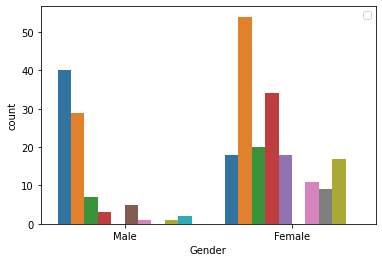

In [26]:
sns.countplot(x="Gender", hue="city", data=df_new,)
plt.legend([],[], frameon=True)

In [49]:
group_name = df_new.groupby(['Gender','Age','city',
'device_used','access_internet'])

In [50]:
group_name.size().unstack()
# Most of them use Smart phones to shopping


access_internet                                    Dial-up  Mobile Internet  \
Gender Age                city        device_used                             
Female 21-30 years        Bangalore   Desktop          NaN              3.0   
                                      Laptop           NaN              3.0   
                                      Smartphone       NaN              5.0   
                          Delhi       Laptop           NaN              NaN   
                                      Smartphone       NaN              NaN   
                          Karnal      Laptop           NaN              3.0   
                                      Smartphone       NaN              4.0   
                          Merrut      Smartphone       NaN              5.0   
                          Noida       Laptop           NaN              7.0   
                                      Smartphone       NaN              7.0   
                          Solan       Smartphone       NaN              5.0   
       31-40 years        Delhi       Laptop           NaN              3.0   
                          Ghaziabad   Smartphone       NaN              5.0   
                          Karnal      Laptop           NaN              3.0   
                                      Smartphone       NaN              4.0   
                          Merrut      Desktop          NaN              1.0   
                          Noida       Laptop           NaN              3.0   
                                      Smartphone       NaN              7.0   
                          Solan       Laptop           NaN              4.0   
       41-50 yaers        Bangalore   Laptop           NaN              4.0   
                                      Smartphone       NaN              8.0   
                          Delhi       Laptop           NaN              NaN   
                          Ghaziabad   Smartphone       NaN              5.0   
                          Karnal      Desktop          NaN              3.0   
                                      Laptop           NaN              1.0   
                          Merrut      Desktop          NaN              3.0   
                          Noida       Desktop          NaN              3.0   
                                      Laptop           NaN              1.0   
                                      Smartphone       NaN              7.0   
       51 years and above Bangalore   Desktop          NaN              3.0   
                          Gurgaon     Laptop           NaN              NaN   
                                      Smartphone       NaN              NaN   
                          Karnal      Smartphone       NaN              1.0   
       Less than 20 years Bangalore   Smartphone       NaN              1.0   
                          Ghaziabad   Smartphone       NaN              NaN   
                          Solan       Smartphone       NaN              NaN   
Male   21-30 years        Bangalore   Smartphone       NaN              3.0   
                          Delhi       Laptop           NaN              5.0   
                          Ghaziabad   Laptop           NaN              1.0   
                          Karnal      Smartphone       NaN              7.0   
                          Noida       Laptop           NaN              1.0   
                                      Tablet           NaN              3.0   
       31-40 years        Bulandshahr Smartphone       NaN              2.0   
                          Delhi       Desktop          4.0              NaN   
                                      Laptop           NaN              1.0   
                                      Smartphone       NaN              4.0   
                          Gurgaon     Tablet           NaN              NaN   
                          Moradabad   Laptop           NaN              5.0   
                          Noida       Desktop     

### Understanding how there are shoping

In [58]:
group_name2= df_new.groupby(['access_internet',
       'screen size',
      'operating_system', 'browser_run'])

In [59]:
group_name2.size().unstack()

browser_run                                        Google chrome  \
access_internet screen size operating_system                       
Dial-up         Others      Window/windows Mobile            4.0   
Mobile Internet 4.7 inches  IOS/Mac                         11.0   
                5 inches    Android                          NaN   
                            Window/windows Mobile            1.0   
                5.5 inches  Android                         37.0   
                            IOS/Mac                          3.0   
                            Window/windows Mobile            3.0   
                Others      Android                         13.0   
                            IOS/Mac                          NaN   
                            Window/windows Mobile           77.0   
Wi-Fi           4.7 inches  IOS/Mac                          4.0   
                5 inches    Android                          1.0   
                5.5 inches  Android                         16.0   
                            IOS/Mac                          4.0   
                            Window/windows Mobile            4.0   
                Others      Android                          5.0   
                            Window/windows Mobile           33.0   

browser_run                                        Mozilla Firefox  Opera  \
access_internet screen size operating_system                                
Dial-up         Others      Window/windows Mobile              NaN    NaN   
Mobile Internet 4.7 inches  IOS/Mac                            NaN    NaN   
                5 inches    Android                            5.0    NaN   
                            Window/windows Mobile              NaN    NaN   
                5.5 inches  Android                            NaN    8.0   
                            IOS/Mac                            NaN    NaN   
                            Window/windows Mobile              NaN    NaN   
                Others      Android                            NaN    NaN   
                            IOS/Mac                            NaN    NaN   
                            Window/windows Mobile              NaN    NaN   
Wi-Fi           4.7 inches  IOS/Mac                            NaN    NaN   
                5 inches    Android                            NaN    NaN   
                5.5 inches  Android                            NaN    NaN   
                            IOS/Mac                            NaN    NaN   
                            Window/windows Mobile              NaN    NaN   
                Others      Android                            NaN    NaN   
                            Window/windows Mobile              NaN    NaN   

browser_run                                        Safari  
access_internet screen size operating_system               
Dial-up         Others      Window/windows Mobile     NaN  
Mobile Internet 4.7 inches  IOS/Mac                   6.0  
                5 inches    Android                   NaN  
                            Window/windows Mobile     NaN  
                5.5 inches  Android                   NaN  
                            IOS/Mac                  23.0  
                            Window/windows Mobile     NaN  
                Others      Android                   NaN  
                            IOS/Mac                   2.0  
                            Window/windows Mobile     NaN  
Wi-Fi           4.7 inches  IOS/Mac                   8.0  
                5 inches    Android                   NaN  
                5.5 inches  Android                   NaN  
                            IOS/Mac                   1.0  
                            Window/windows Mobile     NaN  
                Others      Android                   NaN  
                            Window/windows Mobile     NaN

In [31]:
group_name2.size().unstack().count()

browser_run
Google chrome      15
Mozilla Firefox     1
Opera               1
Safari              5
dtype: int64

In [32]:
group_name3= df_new.groupby(['preferred_payment',
       'abandon_shoppingcart',
       'Why_abandon_Shoppingcart'])

In [33]:
group_name3.size().unstack()

#Most of the time the cart is abondon because of better alternative offer, next stands Promo code not applicable 
#Most of the time cart is abandon when the payment is by credit/debit cards

Why_abandon_Shoppingcart                                 Better alternative offer  \
preferred_payment                  abandon_shoppingcart                             
Cash on delivery (CoD)             Frequently                                 7.0   
                                   Never                                     15.0   
                                   Sometimes                                  5.0   
Credit/Debit cards                 Frequently                                15.0   
                                   Never                                     25.0   
                                   Sometimes                                 53.0   
                                   Very frequently                            NaN   
E-wallets (Paytm, Freecharge etc.) Frequently                                13.0   
                                   Sometimes                                  NaN   

Why_abandon_Shoppingcart                                 Change in price  \
preferred_payment                  abandon_shoppingcart                    
Cash on delivery (CoD)             Frequently                        NaN   
                                   Never                             NaN   
                                   Sometimes                         8.0   
Credit/Debit cards                 Frequently                        NaN   
                                   Never                             NaN   
                                   Sometimes                        29.0   
                                   Very frequently                   NaN   
E-wallets (Paytm, Freecharge etc.) Frequently                        NaN   
                                   Sometimes                         NaN   

Why_abandon_Shoppingcart                                 Lack of trust  \
preferred_payment                  abandon_shoppingcart                  
Cash on delivery (CoD)             Frequently                      NaN   
                                   Never                           NaN   
                                   Sometimes                      19.0   
Credit/Debit cards                 Frequently                      NaN   
                                   Never                           NaN   
                                   Sometimes                       NaN   
                                   Very frequently                 NaN   
E-wallets (Paytm, Freecharge etc.) Frequently                      NaN   
                                   Sometimes                      12.0   

Why_abandon_Shoppingcart                                 No preferred mode of payment  \
preferred_payment                  abandon_shoppingcart                                 
Cash on delivery (CoD)             Frequently                                     NaN   
                                   Never                                          NaN   
                                   Sometimes                                     14.0   
Credit/Debit cards                 Frequently                                     NaN   
                                   Never                                          NaN   
                                   Sometimes                                      NaN   
                                   Very frequently                                NaN   
E-wallets (Paytm, Freecharge etc.) Frequently                                     NaN   
                                   Sometimes                                      NaN   

Why_abandon_Shoppingcart                                 Promo code not applicable  
preferred_payment                  abandon_shoppingcart                             
Cash on delivery (CoD)             Frequently                                  NaN  
                                   Never                                       8.0  
                                   Sometimes                                   NaN  
Credit/

In [34]:
group_name3.size().unstack().count()

Why_abandon_Shoppingcart
Better alternative offer        7
Change in price                 2
Lack of trust                   2
No preferred mode of payment    1
Promo code not applicable       4
dtype: int64

In [35]:
group_name4= df_new.groupby(['Gender','Age','reach_online_retailstore'])
       

In [36]:
group_name4.size().unstack()

reach_online_retailstore   Direct URL  E-mail  Search Engine  Social Media  \
Gender Age                                                                   
Female 21-30 years               14.0     3.0           10.0           5.0   
       31-40 years                3.0     NaN           29.0           NaN   
       41-50 yaers                8.0     5.0           12.0           NaN   
       51 years and above         7.0     3.0            5.0           NaN   
       Less than 20 years         8.0     NaN            NaN           NaN   
Male   21-30 years               10.0     NaN           10.0           NaN   
       31-40 years                6.0     1.0           17.0           NaN   
       41-50 yaers               10.0     6.0            3.0           3.0   
       51 years and above         4.0     NaN            NaN           NaN   
       Less than 20 years         NaN     NaN            1.0           NaN   

reach_online_retailstore   Via application  
Gender Age                                  
Female 21-30 years                    27.0  
       31-40 years                    19.0  
       41-50 yaers                    18.0  
       51 years and above              NaN  
       Less than 20 years              5.0  
Male   21-30 years                     NaN  
       31-40 years                     6.0  
       41-50 yaers                     5.0  
       51 years and above              NaN  
       Less than 20 years              6.0

In [37]:
group_name4.size().unstack().count()
#People seach through Social media is very less
#No relaton to Gender

reach_online_retailstore
Direct URL         9
E-mail             5
Search Engine      8
Social Media       2
Via application    7
dtype: int64

In [38]:
group_name5= df_new.groupby(['reach_online_retailstore',
       'time_explored'])

In [39]:
group_name5.size().unstack()
#If the stores is more then 15 mins then more people prefer to each by URL ,via application or seach Engine 
#If the Stores are very close less then 1 min also, People first prefer to search by Application

time_explored,1-5 mins,11-15 mins,6-10 mins,Less than 1 min,more than 15 mins
reach_online_retailstore,,,,,
Direct URL,14.0,NaN,11.0,NaN,45.0
E-mail,NaN,NaN,18.0,NaN,NaN
Search Engine,NaN,18.0,42.0,NaN,27.0
Social Media,NaN,NaN,NaN,NaN,8.0
Via application,NaN,28.0,NaN,15.0,43.0


In [40]:
group_name5.size().unstack().count()

time_explored
1-5 mins             1
11-15 mins           2
6-10 mins            3
Less than 1 min      1
more than 15 mins    4
dtype: int64

In [41]:
df = df.replace({'indifferent (3)':'indifferent','Agree (4)':'Agree','Strongly agree (5)':'StronglyAgree', 'Strongly disagree (1)':'StronglyDisagree','Dis-agree (2)':'Disagree','Disagree (2)':'Disagree','Indifferent (3)':'indifferent'})
df['city'] = df['city'].replace({'Greater Noida':'Noida'})
df['access_internet'] = df['access_internet'].replace({'Mobile internet':'Mobile Internet'})

In [42]:
df_feedback=df.iloc[:,18:47]
df_feedback

,highlighted_simila_product,Full_info_listed_seller,relevant_info_listed,Ease_navigation,Loading_processing_speed,User_friendly_Interface,Convenient_Payment_methods,Trust_transaction_time,Empathy_customers,guarantee_privacy,...,trust,wide_variety_several cato,Provision_product_info,Monetary_saving,Convenience_of_patronizing,sense_of_adventure,e-tailer_social_status,gratification_favorite_e-tailer,fulfill_certain_roles,value_money_spent
0,3,3,4,4,1,2,2,2,5,4,...,5,3,3,2,3,4,4,5,4,5
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,3,3,3,5,5,5
2,4,4,4,4,4,5,5,5,5,5,...,4,5,5,5,4,4,4,3,3,4
3,4,3,4,5,4,5,5,4,5,5,...,4,4,4,5,4,4,5,4,3,4
4,3,3,4,4,5,5,5,4,5,4,...,5,4,4,5,4,3,1,5,1,5
5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,3,3,4,5
6,4,4,4,4,4,4,4,4,4,4,...,4,4,3,4,4,3,3,4,4,4
7,2,2,1,1,2,1,2,2,1,3,...,1,5,5,5,5,5,1,1,1,4
8,4,5,4,4,4,5,5,5,5,5,...,5,5,4,4,4,4,3,3,4,3
9,5,4,4,5,5,5,4,5,5,5,...,4,4,4,4,4,4,3,3,3,4


## Checking How people are rating different aspects of the application

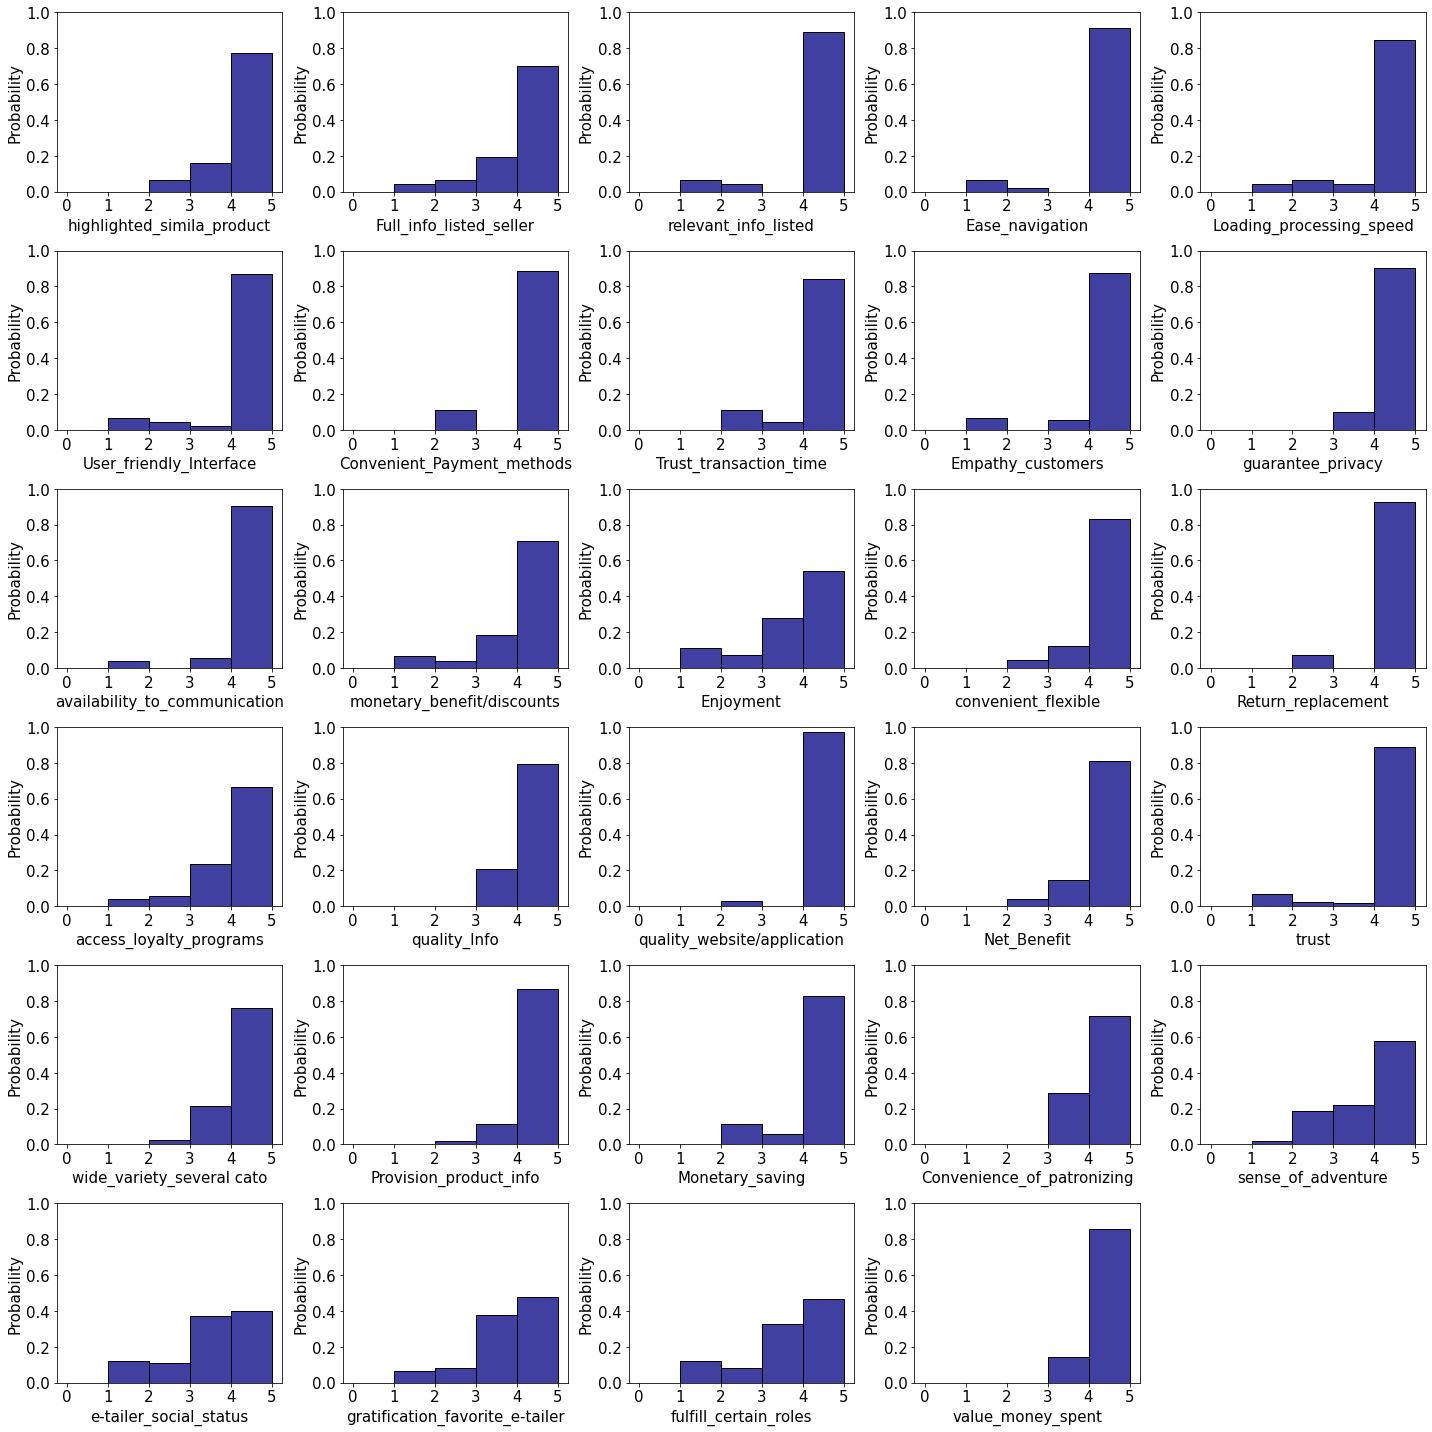

In [62]:
bins = [0,1,2,3,4,5]

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_feedback:
    if plotnumber<=30:
        ax=plt.subplot(6,5,plotnumber)
        sns.histplot(df_feedback[column], bins=bins,kde=False,  color='navy',stat="probability")
        plt.xlabel(column,fontsize=15)
        plt.xticks(size=15)
        plt.ylabel('Probability',fontsize=15,)
        plt.yticks(size=15)
        plt.ylim(0, 1)
    plotnumber+=1
plt.tight_layout()  

## The DataApplication should be concentrating on having 

        18 The content on the website must be easy to read and understand',
       '19 Information on similar product to the one highlighted  is important for product comparison',
       '20 Complete information on listed seller and product being offered is important for purchase decision.',
       '21 All relevant information on listed products must be stated clearly',
       '22 Ease of navigation in website', '23 Loading and processing speed',
       '24 User friendly Interface of the website',
       '25 Convenient Payment methods',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
       '27 Empathy (readiness to assist with queries) towards the customers',
       '28 Being able to guarantee the privacy of the customer',
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
       '30 Online shopping gives monetary benefit and discounts',
 #### Need Improvement-31 Enjoyment is derived from shopping online'
       '32 Shopping online is convenient and flexible',   
       '33 Return and replacement policy of the e-tailer is important for purchase decision', 
 #### Need Improvement- 34 Gaining access to loyalty programs is a benefit of shopping online',
       '35 Displaying quality Information on the website improves satisfaction of customers',
### Best Part -36 User derive satisfaction while shopping on a good quality website or application'
       '37 Net Benefit derived from shopping online can lead to users satisfaction',
       '38 User satisfaction cannot exist without trust',
       '39 Offering a wide variety of listed product in several category',
       '40 Provision of complete and relevant product information',
       '41 Monetary savings',
       '42 The Convenience of patronizing the online retailer',
 ####  Need Improvement-43 Shopping on the website gives you the sense of adventure',
 #### Need Improvement-44 Shopping on your preferred e-tailer enhances your social status',
 #### Need Improvement- 45 You feel gratification shopping on your favorite e-tailer',
 #### Need Improvement- 46 Shopping on the website helps you fulfill certain roles',
       '47 Getting value for money spent',